# Confusion Matrix

La **Confusion Matrix** (matrice di confusione) è uno strumento utilizzato per valutare le prestazioni di un modello di classificazione. Mostra il numero di predizioni corrette e scorrette suddiviso per classe. È particolarmente utile per capire quali tipi di errori il modello sta facendo.

La matrice di confusione è solitamente una tabella quadrata che ha le seguenti componenti:

1. **True Positives (TP)**: Il numero di campioni che sono stati correttamente classificati come positivi.
2. **True Negatives (TN)**: Il numero di campioni che sono stati correttamente classificati come negativi.
3. **False Positives (FP)**: Il numero di campioni che sono stati classificati erroneamente come positivi (falsi positivi).
4. **False Negatives (FN)**: Il numero di campioni che sono stati classificati erroneamente come negativi (falsi negativi).

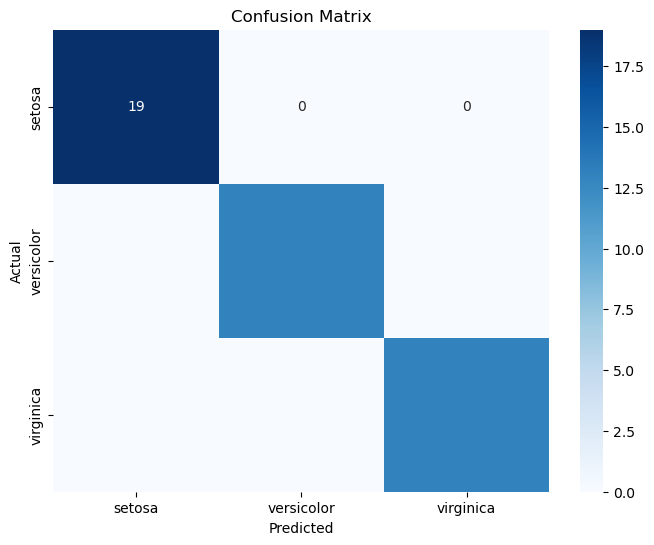

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Carica il dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Suddivide il dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea e addestra il modello
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Effettua le predizioni
y_pred = model.predict(X_test)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Crea una heatmap della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [18]:
import plotly.express as px
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Carica il dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Suddivide il dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea e addestra il modello
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Effettua le predizioni
y_pred = model.predict(X_test)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Converti la matrice di confusione in un DataFrame per Plotly
import pandas as pd
cm_df = pd.DataFrame(cm_normalized, index=iris.target_names, columns=iris.target_names)

# Crea una heatmap interattiva con Plotly
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale='Blues',
                labels={'x': 'Predicted', 'y': 'Actual', 'color': 'Proportion'},
                title='Normalized Confusion Matrix')

# Mostra il grafico
fig.show()

In [19]:
# Stampa il report di classificazione
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Le prestazioni di un albero di classificazione possono essere valutate utilizzando diverse metriche. Queste metriche aiutano a comprendere quanto bene l'albero di classificazione stia eseguendo il compito di classificazione. Ecco le principali metriche utilizzate:

### 1. **Accuratezza (Accuracy)**

- **Definizione**: La proporzione di predizioni corrette rispetto al totale delle predizioni.
- **Formula**:
Accuracy=TP+TN+FP+FNTP+TN
dove:
    
    Accuracy=TP+TNTP+TN+FP+FN\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    
    - **TP**: True Positives (Vero Positivi)
    - **TN**: True Negatives (Vero Negativi)
    - **FP**: False Positives (Falsi Positivi)
    - **FN**: False Negatives (Falsi Negativi)

### 2. **Precisione (Precision)**

- **Definizione**: La proporzione di campioni classificati come positivi che sono effettivamente positivi.
- **Formula**:
Precision=TP+FPTP
    
    Precision=TPTP+FP\text{Precision} = \frac{TP}{TP + FP}
    

### 3. **Richiamo (Recall)**

- **Definizione**: La proporzione di campioni positivi che sono stati correttamente identificati come positivi dal modello.
- **Formula**:
Recall=TP+FNTP
    
    Recall=TPTP+FN\text{Recall} = \frac{TP}{TP + FN}
    

### 4. **F1 Score**

- **Definizione**: La media armonica di precisione e richiamo. Fornisce un'unica misura della performance che bilancia precisione e richiamo.
- **Formula**:
F1 Score=2×Precision+RecallPrecision×Recall
    
    F1 Score=2×Precision×RecallPrecision+Recall\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
    

### 5. **Specificità (Specificity)**

- **Definizione**: La proporzione di campioni negativi che sono stati correttamente identificati come negativi.
- **Formula**:
Specificity=TN+FPTN
    
    Specificity=TNTN+FP\text{Specificity} = \frac{TN}{TN + FP}
    

### 6. **Area sotto la Curva ROC (AUC-ROC)**

- **Definizione**: L'area sotto la curva ROC (Receiver Operating Characteristic) rappresenta la capacità del modello di distinguere tra le classi. Un AUC vicino a 1 indica una buona separazione tra le classi.
- **ROC Curve**: Mostra il trade-off tra il tasso di veri positivi e il tasso di falsi positivi.

### 7. **Matrice di Confusione**

- **Definizione**: Mostra il numero di predizioni corrette e errate per ciascuna classe. Utilizzata per calcolare le metriche di classificazione e per analizzare gli errori del modello.

### 8. **Log-Loss (Loss Function)**

- **Definizione**: Misura la performance del classificatore basata sulla probabilità assegnata alle classi vere. È particolarmente utile quando si tratta di classificazione probabilistica.
- **Formula**:
Log-Loss=−N1i=1∑Nc=1∑Cyi,clog(pi,c)
dove:
    
    Log-Loss=−1N∑i=1N∑c=1Cyi,clog⁡(pi,c)\text{Log-Loss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(p_{i,c})
    
    - **N**: Numero di campioni
    - **C**: Numero di classi
    - **yi,cy_{i,c}yi,c**: Indicatore se il campione i è della classe c
    - **pi,cp_{i,c}pi,c**: Probabilità che il campione i appartenga alla classe c

### 9. **Gini Index e Entropia**

- **Definizione**: Questi sono criteri di impurezza utilizzati nella costruzione dell'albero per decidere come suddividere i nodi. Non sono metriche di performance ma sono importanti per comprendere come l'albero è stato costruito.
    - **Gini Index**:
    Gini Index=1−i=1∑Cpi2
        
        Gini Index=1−∑i=1Cpi2\text{Gini Index} = 1 - \sum_{i=1}^{C} p_i^2
        
    - **Entropia**:
    Entropy=−i=1∑Cpilog(pi)
        
        Entropy=−∑i=1Cpilog⁡(pi)\text{Entropy} = -\sum_{i=1}^{C} p_i \log(p_i)
        

Queste metriche forniscono una panoramica completa delle prestazioni del modello di classificazione e aiutano a diagnosticare e migliorare il modello.

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import plotly.express as px

# Carica il dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Suddivide il dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea e addestra il modello
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Effettua le predizioni
y_pred = model.predict(X_test)

# Calcola la matrice di confusione
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Calcola le metriche
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC-ROC per problemi multi-classe (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = model.predict_proba(X_test)
auc_roc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

# Calcola la specificità per ogni classe
specificity = {}
for i in range(len(target_names)):
    tn = np.sum(np.delete(cm, i, axis=0).flatten())  # True Negatives
    fp = np.sum(cm[:, i]) - cm[i, i]  # False Positives
    specificity[i] = tn / (tn + fp) if (tn + fp) > 0 else 0

# Crea una tabella dei risultati
results = {
    'Metric': ['Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)', 'AUC-ROC'] + [f'Specificity ({name})' for name in target_names],
    'Value': [accuracy, precision, recall, f1, auc_roc] + [specificity[i] for i in range(len(target_names))]
}

results_df = pd.DataFrame(results)
display(results_df)

# Converti la matrice di confusione in un DataFrame per Plotly
cm_df = pd.DataFrame(cm_normalized, index=target_names, columns=target_names)

# Crea una heatmap interattiva con Plotly
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale='Blues',
                labels={'x': 'Predicted', 'y': 'Actual', 'color': 'Proportion'},
                title='Normalized Confusion Matrix')

# Mostra il grafico
fig.show()


,Metric,Value
0,Accuracy,1.0
1,Precision (Weighted),1.0
2,Recall (Weighted),1.0
3,F1 Score (Weighted),1.0
4,AUC-ROC,1.0
5,Specificity (setosa),1.0
6,Specificity (versicolor),1.0
7,Specificity (virginica),1.0
